In [ ]:
#Veriseti indirildi.

!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-29 16:05:10--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.219.12.196, 2600:1408:c400:1184::317f, 2600:1408:c400:1192::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.219.12.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   144MB/s    in 5.6s    

2022-08-29 16:05:16 (140 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
#İndirilen zip'li dosya zipten çıkarılıyor.

!unzip kagglecatsanddogs_5340.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  i

In [ ]:
#Kütüphaneler Yüklendi.

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from PIL import Image
import warnings
import tqdm
import random
warnings.filterwarnings('ignore')


from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, BatchNormalization
from keras.layers import Dense, Dropout

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from google.colab.patches import cv2_imshow
 

In [ ]:
#Cat klasöründe kaç tane dosya olduğunu listeledi.

path, dirs, files = next(os.walk('/content/PetImages/Cat'))
file_count = len(files)
print('Kedi Fotoğraf Sayisi: ', file_count)

Kedi Fotoğraf Sayisi:  12501


In [ ]:
#Dog klasöründe kaç tane dosya olduğunu listeledi.

path, dirs, files = next(os.walk('/content/PetImages/Dog'))
file_count = len(files)
print('Köpek Fotoğraf Sayisi: ', file_count)

Köpek Fotoğraf Sayisi:  12501


In [ ]:
#Ölçeklendireceğimiz kedi ve köpek fotoğraflarını buraya aktaracağız.

os.mkdir('/content/Resized')

In [ ]:
#Resized Klasöründe Cat Klasörü oluşturuldu.

os.mkdir('/content/Resized/Cat')

In [ ]:
#Resized Klasöründe Dog Klasörü oluşturuldu.

os.mkdir('/content/Resized/Dog')

In [ ]:
#Cat klasöründeki resimleri 220x220 boyutunda olacak şekilde cat klasörüne kaydedildi.

original_folder = '/content/PetImages/Cat/'
resized_folder = '/content/Resized/Cat/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((220,220))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
#Dog klasöründeki resimleri 220x220 boyutunda olacak şekilde dog klasörüne kaydedildi.


original_folder = '/content/PetImages/Dog/'
resized_folder = '/content/Resized/Dog/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((220,220))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [ ]:
#Kedi resimleri için Cat etiketlemesi, Köpek resimleri için Dog etiketlemesi yapıldı.

input_path = []
label = []

for class_name in os.listdir("Resized"):
  for path in os.listdir("Resized/"+class_name):
    if class_name == 'Cat':
      label.append('Cat')
    else:
      label.append('Dog')
    input_path.append(os.path.join("Resized", class_name, path))
print(input_path[3000], label[3000]) 

Resized/Cat/11896.jpg Cat


In [ ]:
#Dataframe oluşturulup images ve label sütunları oluşturuldu.

df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,Resized/Dog/465.jpg,Dog
1,Resized/Cat/1932.jpg,Cat
2,Resized/Dog/11986.jpg,Dog
3,Resized/Cat/1757.jpg,Cat
4,Resized/Cat/8671.jpg,Cat


In [ ]:
#2 adet etiketimiz ve 2 etiketimize ait 2000 adet veri bulunmaktadır.

values, counts = np.unique(label, return_counts=True)
print(values)
print(counts)

['Cat' 'Dog']
[2000 2000]


In [ ]:
#İlk 5 etiket çağrıldı. Toplam 4000 adet etiket bulunmaktadır.

print(label[0:5])
print(len(label))

['Dog', 'Dog', 'Dog', 'Dog', 'Dog']
4000


In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
#Buradan sonrasında emin değilim.

from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 3200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
#loss ve accuarcy değerleri

history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
7/7 [==============================] - 64s 8s/step - loss: 1.1973 - accuracy: 0.5028 - val_loss: 0.7035 - val_accuracy: 0.5038
Epoch 2/10
7/7 [==============================] - 62s 8s/step - loss: 0.6945 - accuracy: 0.5103 - val_loss: 0.6937 - val_accuracy: 0.4963
Epoch 3/10
7/7 [==============================] - 61s 9s/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6916 - val_accuracy: 0.5038
Epoch 4/10
7/7 [==============================] - 60s 8s/step - loss: 0.6909 - accuracy: 0.5094 - val_loss: 0.6861 - val_accuracy: 0.5863
Epoch 5/10
7/7 [==============================] - 62s 8s/step - loss: 0.6826 - accuracy: 0.5769 - val_loss: 0.6771 - val_accuracy: 0.5725
Epoch 6/10
7/7 [==============================] - 61s 8s/step - loss: 0.6686 - accuracy: 0.6031 - val_loss: 0.6602 - val_accuracy: 0.6087
Epoch 7/10
7/7 [==============================] - 60s 8s/step - loss: 0.6588 - accuracy: 0.6047 - val_loss: 0.6480 - val_accuracy: 0.6200
Epoch 8/10
7/7 [==================

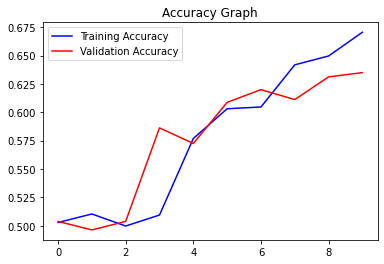

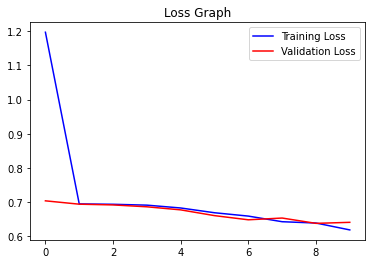

In [ ]:
#Değerlerin plot grafiği

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))


plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()